In [1]:
"""
Q19
Please use Python to complete this assignment. Please submit your Jupyter notebook, showing your functions and unit test cases with the code and outputs.
--------------------------------------------------------------------------------------

Use the hsbdemo.csv data set from UCLA. 

("https://stats.idre.ucla.edu/stat/data/hsbdemo.csv")
a. Input dataframe (df)
b. a vector of column names that list the quantitative variables to be analyzed.
c. a vector called funs, that describe the type of summaries to perform (see below by the list of summaries to perform)
d. and a group by variable that would allow the end user to condition out these statistics by levels of a categorical variable.

“funs” arguments:
“sum”, “mean”, “max”, “min”

The function should return a data frame with appropriately named fields

We are looking for:
•	Coding efficiency - how easy it is to read the code
•	Performance - how fast it runs against large datasets
•	Robustness – how easy is it to break the function call
•	Accuracy – does it produce the correct the results.
"""

'\nQ19\nPlease use Python to complete this assignment. Please submit your Jupyter notebook, showing your functions and unit test cases with the code and outputs.\n--------------------------------------------------------------------------------------\n\nUse the hsbdemo.csv data set from UCLA. \n\n("https://stats.idre.ucla.edu/stat/data/hsbdemo.csv")\na. Input dataframe (df)\nb. a vector of column names that list the quantitative variables to be analyzed.\nc. a vector called funs, that describe the type of summaries to perform (see below by the list of summaries to perform)\nd. and a group by variable that would allow the end user to condition out these statistics by levels of a categorical variable.\n\n“funs” arguments:\n“sum”, “mean”, “max”, “min”\n\nThe function should return a data frame with appropriately named fields\n\nWe are looking for:\n•\tCoding efficiency - how easy it is to read the code\n•\tPerformance - how fast it runs against large datasets\n•\tRobustness – how easy is i

In [2]:
# Imports
import pandas as pd
# Display options
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

In [3]:
#Part a.
#Second column's identifier indicates a boolean datatype but is not the case...
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/hsbdemo.csv", index_col=['id'])
print(df.sort_index().head(10))

    female     ses  schtyp      prog  read  write  math  science  socst        honors  awards  cid
id                                                                                                
1   female     low  public  vocation    34     44    40       39     41  not enrolled       0    1
2   female  middle  public  vocation    39     41    33       42     41  not enrolled       0    1
3     male     low  public  academic    63     65    48       63     56      enrolled       5   16
4   female     low  public  academic    44     50    41       39     51  not enrolled       1    3
5     male     low  public  academic    47     40    43       45     31  not enrolled       0    4
6   female     low  public  academic    47     41    46       40     41  not enrolled       0    3
7     male  middle  public  academic    57     54    59       47     51  not enrolled       1   11
8   female     low  public  academic    39     44    52       44     48  not enrolled       0    5
9     male

In [4]:
#Part b.
#I like using the undocumented function _get_numeric_data(), select_dtypes() is an alternative
numericData = df._get_numeric_data()
numericVariableNames = list(numericData.columns)
numericData.head()

,read,write,math,science,socst,awards,cid
id,,,,,,,
45,34,35,41,29,26,0,1
108,34,33,41,36,36,0,1
15,39,39,44,26,42,0,1
67,37,37,42,33,32,0,1
153,39,31,40,39,51,0,1


In [5]:
#Part c.
funs = ['sum', 'mean', 'max', 'min'] #we can also define our own functions if we'd like

#Part d. 
groupVar = 'female'

In [6]:
#Now suppose we want do group by the gender of the students, and see the statistical summaries on the numeric data...

results = df.groupby(groupVar)[numericVariableNames].agg(funs)
print(results.T) #printing transpose of results for readability

#It seems like in this data set, some of the anomalies are that women win 1.5 times the amount of awards that males do, 
#even though men have on average higher scores across reading, writing, math, science, and social studies.
print('\nAvg. Awards Won by Females:', results.loc['female', 'awards']['mean'])
print('Avg. Awards Won by Males:', results.loc['male', 'awards']['mean'])

female             female         male
read    sum   5639.000000  4807.000000
        mean    51.733945    52.824176
        max     76.000000    76.000000
        min     28.000000    31.000000
write   sum   5994.000000  4561.000000
        mean    54.990826    50.120879
        max     67.000000    67.000000
        min     35.000000    31.000000
math    sum   5711.000000  4818.000000
        mean    52.394495    52.945055
        max     72.000000    75.000000
        min     33.000000    35.000000
science sum   5526.000000  4844.000000
        mean    50.697248    53.230769
        max     69.000000    74.000000
        min     29.000000    26.000000
socst   sum   5768.000000  4713.000000
        mean    52.917431    51.791209
        max     71.000000    71.000000
        min     26.000000    26.000000
awards  sum    214.000000   120.000000
        mean     1.963303     1.318681
        max      7.000000     7.000000
        min      0.000000     0.000000
cid     sum   1143.000000

In [64]:
"""
20
Use the data set Binary_classification.zip (attached):
To build a binary classification model.  Assume that all the columns apart from the target can be used as features to predict the target. 
 
Carry out the following steps and answer the questions as you go along.
 
a)     Build a predictive model that best fits the data (according to you). What is the evidence that the model hasn’t under or over fitted?
b)     What was your choice of evaluation metric and why?
c)     Justify your choice of your learning algorithm. What are the pros and cons of the algorithm you chose
"""

'\n20\nUse the data set Binary_classification.zip (attached):\nTo build a binary classification model.  Assume that all the columns apart from the target can be used as features to predict the target. \n \nCarry out the following steps and answer the questions as you go along.\n \na)     Build a predictive model that best fits the data (according to you). What is the evidence that the model hasn’t under or over fitted?\nb)     What was your choice of evaluation metric and why?\nc)     Justify your choice of your learning algorithm. What are the pros and cons of the algorithm you chose\n'

In [71]:
data = pd.read_csv('binary_classification_ds.csv', index_col=['id'])
data.head(10)

,col_24,col_263,col_264,col_214,col_39,col_280,col_140,...,col_17,col_259,col_247,col_287,col_990,col_991,target
id,,,,,,,,,,,,,,,
484858,0.998527,0,0,0,0.250000,0,0.011236,...,0.153846,0,0,0,16,-1,0
241714,0.999966,0,0,0,0.191176,0,0.000000,...,0.076923,0,0,1,12,-1,0
198733,0.998017,0,1,0,0.176471,0,0.112360,...,0.230769,0,0,0,11,-1,0
106045,0.000000,0,0,0,0.102941,0,0.022472,...,0.000000,0,0,0,6,-1,0
28242,0.997506,0,0,0,0.058824,0,0.011236,...,0.153846,0,0,0,3,-1,0
92314,0.000000,0,0,0,0.294118,0,0.011236,...,0.000000,0,0,0,19,-1,0
403297,0.996514,0,0,0,0.191176,0,0.011236,...,0.307692,0,0,0,12,-1,0
273801,0.994517,0,0,0,0.220588,0,0.000000,...,0.230769,0,0,0,14,-1,0
224845,0.000000,0,0,0,0.470588,0,0.011236,...,0.000000,0,0,0,31,-1,0


           count      mean       std  min       25%       50%       75%  max
col_24   50000.0  0.524521  0.497946  0.0  0.000000  0.993550  0.997541  1.0
col_263  50000.0  0.000040  0.006324  0.0  0.000000  0.000000  0.000000  1.0
col_264  50000.0  0.060380  0.238192  0.0  0.000000  0.000000  0.000000  1.0
col_214  50000.0  0.013480  0.115319  0.0  0.000000  0.000000  0.000000  1.0
col_39   50000.0  0.216541  0.158685  0.0  0.088235  0.191176  0.323529  1.0
col_280  50000.0  0.001800  0.042389  0.0  0.000000  0.000000  0.000000  1.0
col_140  50000.0  0.023029  0.068912  0.0  0.011236  0.011236  0.011236  1.0
col_328  50000.0  0.007780  0.087861  0.0  0.000000  0.000000  0.000000  1.0
col_309  50000.0  0.199420  0.399568  0.0  0.000000  0.000000  0.000000  1.0
col_201  50000.0  0.006580  0.080851  0.0  0.000000  0.000000  0.000000  1.0


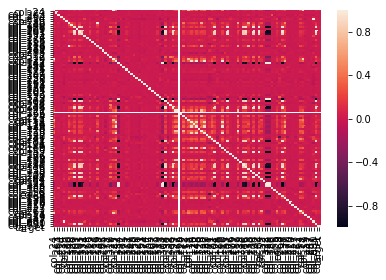

In [76]:
print(data.describe().T.head(10))
#perhaps we should normalize?

import seaborn as sns
# plot the correlation heatmap
sns.heatmap(data.corr(), 
        xticklabels=data.columns,
        yticklabels=data.columns)

#the variables seem to be mostly uncorrelated

In [73]:
#normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.iloc[:,:-1])
features_norm = pd.DataFrame(scaler.transform(data.iloc[:,:-1]), index=data.index, columns=data.columns[:-1])
print(features_norm.describe().T.head(10))

In [74]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X = features_norm.values
y = data['target'].values

d_classifiers = {'LogisticRegression': LogisticRegression(max_iter=1000),
                'KNN': KNeighborsClassifier(n_neighbors=5),
                'SVM': svm.SVC(kernel='linear')}

metrics = {'Avg. Precision':precision_score,
           'Avg. Recall':recall_score,
           'Avg. F1 Score': f1_score,
           'Avg. ROC AUC Score':roc_auc_score}

results = pd.DataFrame(index=metrics, columns=d_classifiers.keys())

for classifier in d_classifiers.keys():
    print(classifier)
    clf = d_classifiers[classifier]
    
    #K-fold cross-validation and average metrics
    kf = KFold(n_splits=5, shuffle=False)
    metricsForKFolds = {}
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf_fitted = clf.fit(X_train,y_train)
        y_pred = clf_fitted.predict(X_test)
        #print(pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_test)],axis=1))
        
        #compute and store every performance metric on test
        for metric in metrics.keys():
            func = metrics[metric]
            metricValue = func(y_test, y_pred, average="macro")
            try:
                metricsForKFolds[metric].append(metricValue)
            except KeyError:
                metricsForKFolds[metric] = [metricValue]
                
    for metric in metrics.keys():
        results.loc[metric, classifier] = np.mean(metricsForKFolds[metric])
    print(results[[classifier]])
        
results

LogisticRegression
                   LogisticRegression
Avg. Precision               0.583478
Avg. Recall                  0.500242
Avg. F1 Score                0.492162
Avg. ROC AUC Score           0.500242
KNN
                         KNN
Avg. Precision      0.491161
Avg. Recall         0.499964
Avg. F1 Score       0.492017
Avg. ROC AUC Score  0.499964
SVM


C:\Users\Witcher\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Witcher\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Witcher\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""
Q21
The following data set contains 2 sets of forecasts (“champion” and “challenger”) for the # of monthly sales achieved by a Brand for each of its primary sales channels from July 2017 through June 2018.  

The # of monthly sales that the Brand actually achieved is also provided.
(also attached in compressed file)

Create a visualization (or set of visualizations) which compares the 2 forecasts so that the consumer of the visualization can determine which forecasting model is performing better.   

Assume that the consumer of the visualization is a non-technical marketing colleague without any data science training or background.
"""

In [47]:
data = pd.read_csv('forecast2.csv', skiprows=[0,1], header=None, thousands=',')
data.columns = ['date', 'market', 'channel', 'actual sales', 'challenger forecast', 'champion forecast']
data.set_index('date', inplace=True)
data.head(10)

,market,channel,actual sales,challenger forecast,champion forecast
date,,,,,
7/1/2017,USA,Channel A,3773,3226,3877
7/1/2017,USA,Channel B,1779,1787,1514
7/1/2017,USA,Channel C,18454,20346,21124
8/1/2017,USA,Channel A,3498,3233,4488
8/1/2017,USA,Channel B,2057,1991,1834
8/1/2017,USA,Channel C,16081,21824,21142
9/1/2017,USA,Channel A,3175,3340,3824
9/1/2017,USA,Channel B,1594,1428,1575
9/1/2017,USA,Channel C,12737,11407,19448


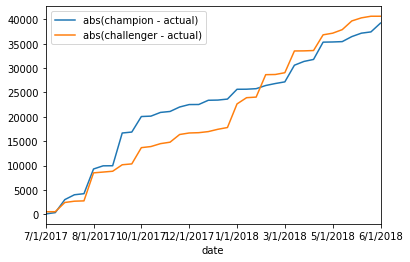

In [60]:
import matplotlib.pyplot as plt

#cumulative difference from actual sales
data['abs(champion - actual)'] = (data['champion forecast'] - data['actual sales']).abs()
data['abs(challenger - actual)'] = (data['challenger forecast'] - data['actual sales']).abs()

data['abs(champion - actual)'].cumsum().plot(legend=True)
data['abs(challenger - actual)'].cumsum().plot(legend=True)

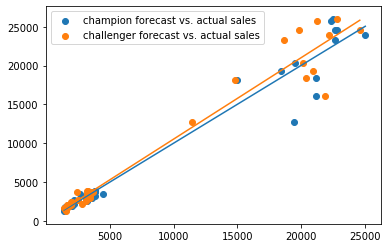

In [59]:
#scatterplots of forecast vs. realized and their best fit lines
x = data['champion forecast']
y = data['actual sales']

plt.figure(0)
plt.scatter(x, y, label='champion forecast vs. actual sales')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

x = data['challenger forecast']
y = data['actual sales']

plt.scatter(x, y, label='challenger forecast vs. actual sales')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.legend(loc="upper left")

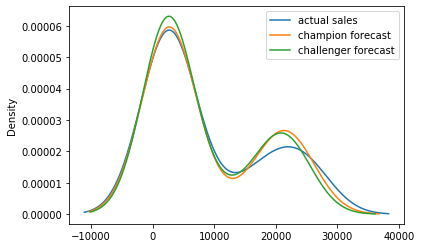

In [62]:
#plot probability density functions of both forecasts and realized
data['actual sales'].plot(kind='density', legend=True)
data['champion forecast'].plot(kind='density', legend=True)
data['challenger forecast'].plot(kind='density', legend=True)